说明：

### 生成测试数据 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [3]:
n_train = 20
n_test = 200
n_averages = 50
n_features_max = 75
step = 4

In [4]:
#定义生成数据的函数
def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers = [[-2],[2]])
    if n_features >1:
        X = np.hstack([X, np.random.randn(n_samples, n_features-1)])
    return X, y

In [5]:
X, y = generate_data(10, 5)

In [6]:
print(X)

[[ 1.30302709 -2.00648701  0.00784789 -0.34670235 -0.05644789]
 [-1.41776084 -2.3182529  -0.10684941  0.11003039  0.73602288]
 [ 2.41984039  0.62146899 -0.89888043  0.73447483 -1.45023672]
 [-1.48894686 -0.06327815 -0.20938463  0.88742398  0.41736506]
 [ 1.51182264 -2.05163353 -0.53729767 -1.79671809 -0.85425988]
 [ 3.18346008 -0.31450829 -0.11178813  1.56620595 -0.45160138]
 [-3.30273348 -0.02828335 -0.15526759 -0.47341864 -0.39882383]
 [-3.16233474 -0.45256288 -1.60712168  1.42726883  1.19819194]
 [-0.44850302 -0.11496807  1.47414408 -0.2974038   0.52650571]
 [-2.44128428  0.05622514  0.29884184  0.65118804  1.82418485]]


In [7]:
print(y)

[1 0 1 0 1 1 0 0 1 0]


In [8]:
import pandas as pd

In [9]:
pd.set_option('precision',2)

In [11]:
df=pd.DataFrame(np.hstack([y.reshape(10,1),X]))

In [12]:
df.columns = ['y', 'X0','X1','X2','X3','X4']

In [13]:
df.head()

,y,X0,X1,X2,X3,X4
0,1.0,1.30,-2.01,7.85e-03,-0.35,-0.06
1,0.0,-1.42,-2.32,-1.07e-01,0.11,0.74
2,1.0,2.42,0.62,-8.99e-01,0.73,-1.45
3,0.0,-1.49,-0.06,-2.09e-01,0.89,0.42
4,1.0,1.51,-2.05,-5.37e-01,-1.80,-0.85


### 修改特征数量并测试shrinkage功能 

In [14]:
acc_clf1, acc_clf2 = [], []

In [15]:
n_features_range = range(1, n_features_max +1, step)

In [16]:
#使用了2个循环，外循环设置特征数量变化，内循环尝试LDA精度
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)
        
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X,y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X,y)
        
        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X,y)
        score_clf2 += clf2.score(X,y)
    
    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

In [17]:
print(acc_clf1)

[0.97440000000000015, 0.96889999999999954, 0.9627, 0.95610000000000017, 0.95260000000000022, 0.94609999999999983, 0.94309999999999983, 0.93889999999999996, 0.9401999999999997, 0.92860000000000009, 0.92440000000000011, 0.91029999999999989, 0.93170000000000019, 0.91090000000000015, 0.91900000000000004, 0.90629999999999977, 0.89890000000000003, 0.90829999999999989, 0.89500000000000002]


In [18]:
print(acc_clf2)

[0.97440000000000015, 0.9548000000000002, 0.91339999999999988, 0.8475999999999998, 0.71800000000000008, 0.7639999999999999, 0.7800999999999999, 0.79589999999999994, 0.58340000000000014, 0.55390000000000017, 0.53520000000000001, 0.53950000000000009, 0.50540000000000007, 0.50370000000000004, 0.50780000000000003, 0.50039999999999996, 0.49850000000000011, 0.50060000000000004, 0.48629999999999995]


### plot比较结果 

In [19]:
features_samples_ratio = np.array(n_features_range) / n_train

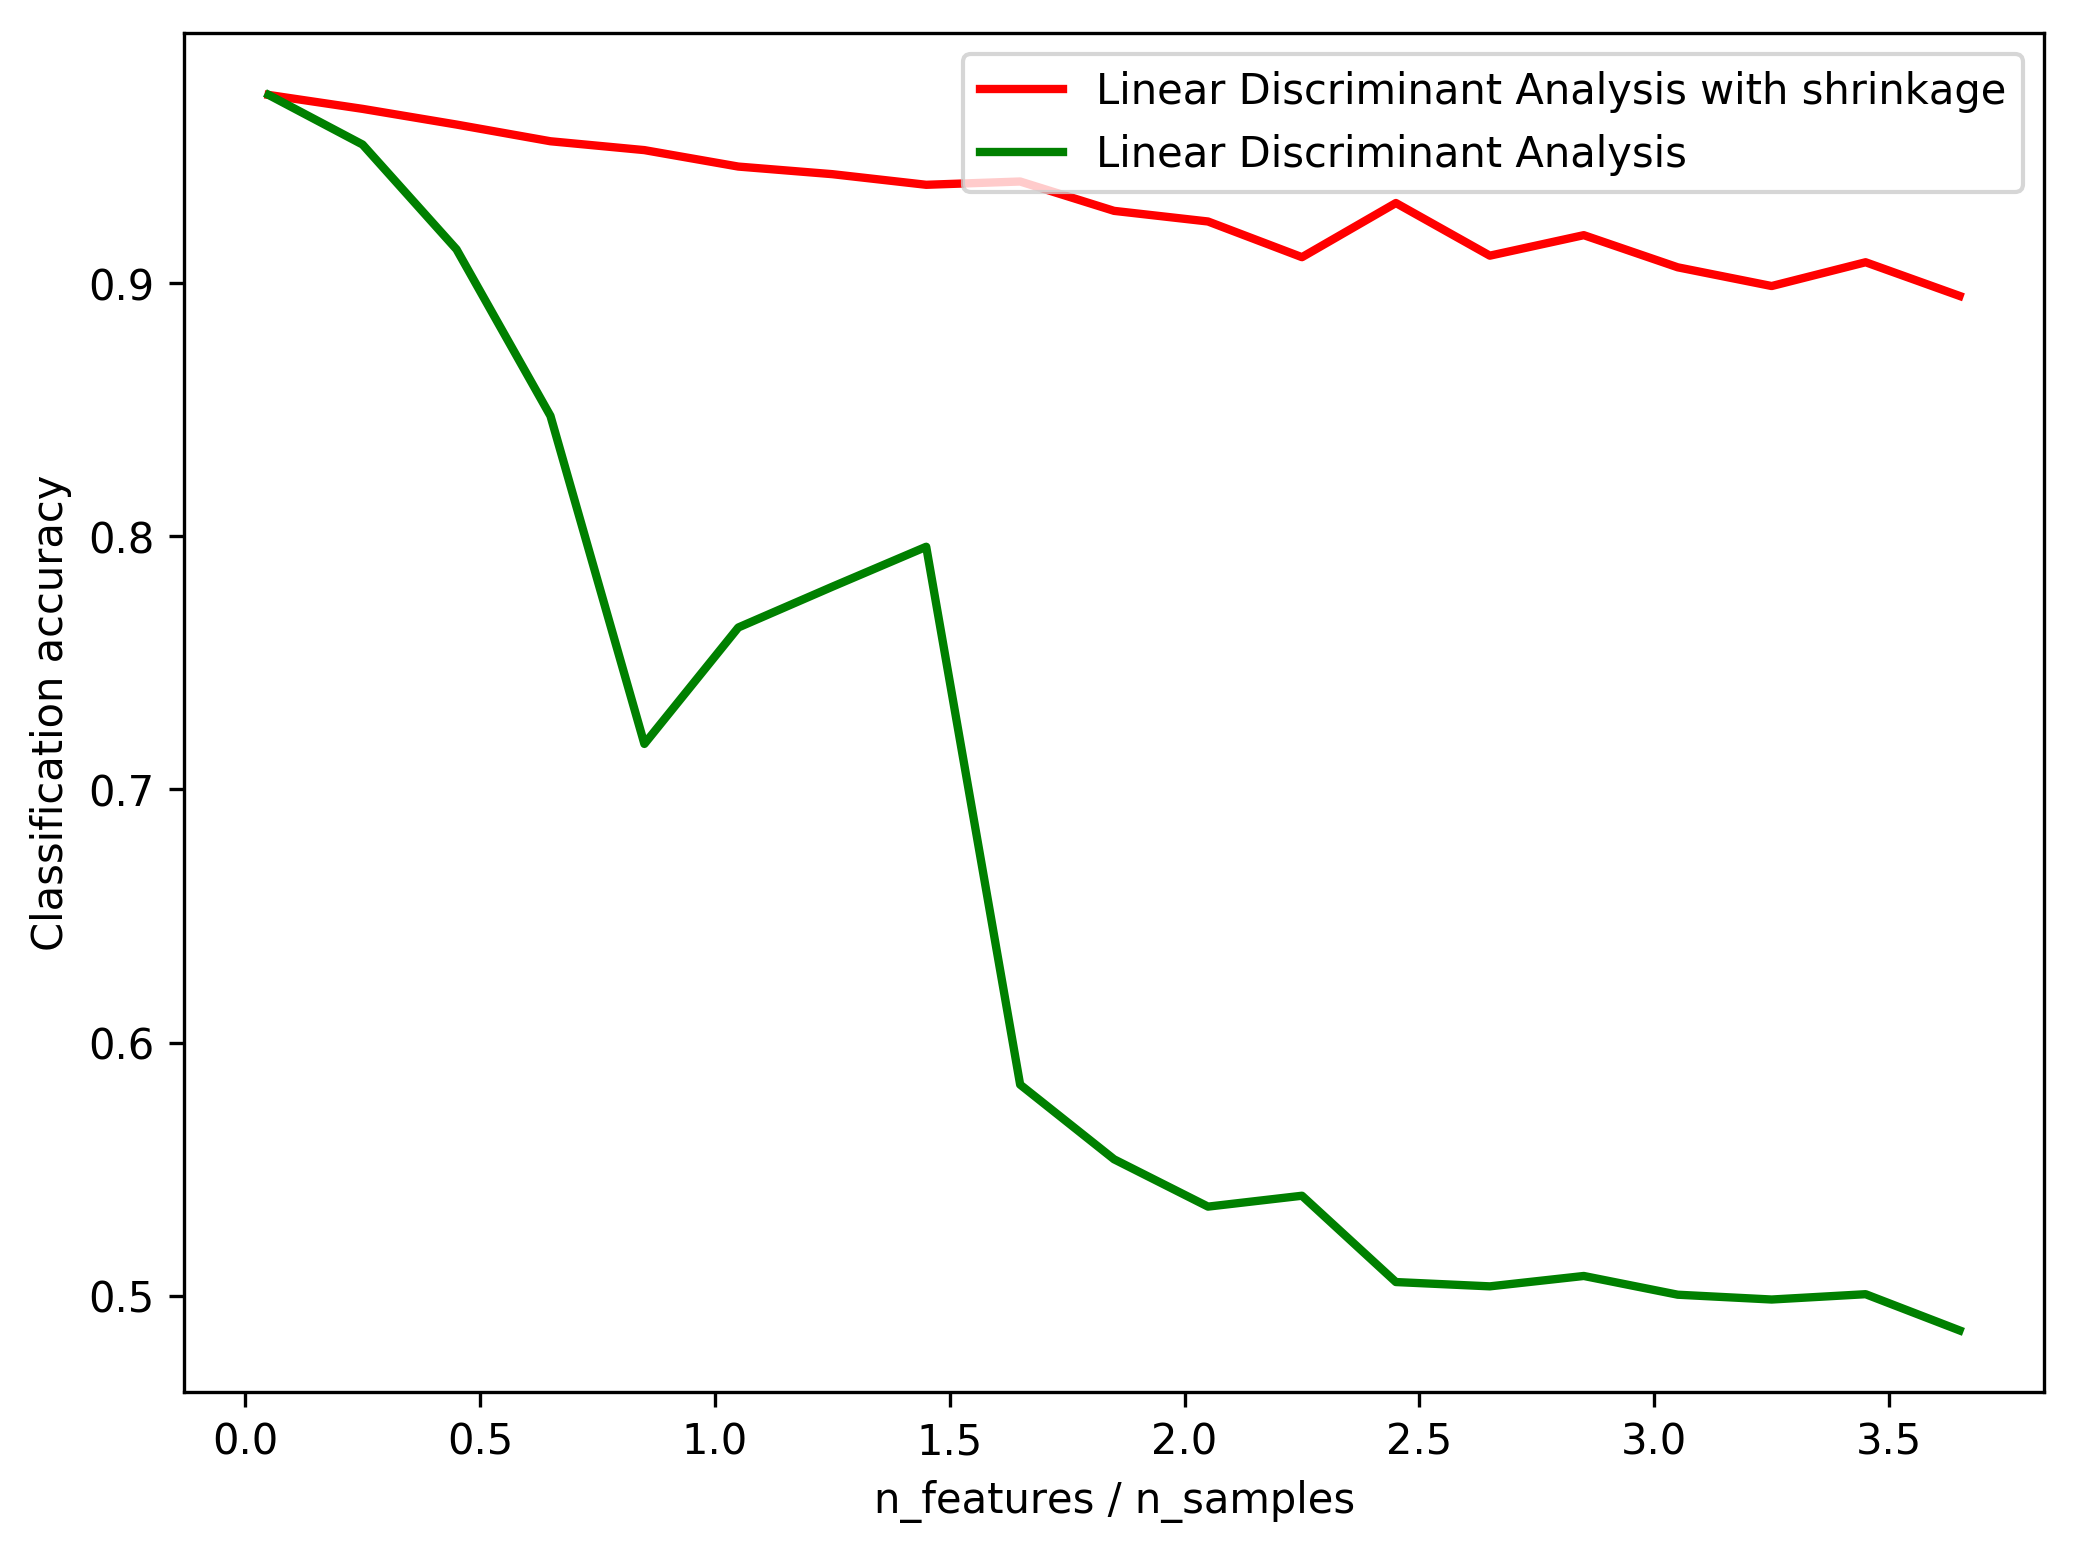

In [20]:
fig = plt.figure(figsize = (8,6), dpi=300)
plt.plot(features_samples_ratio, acc_clf1, linewidth =2 ,
        label = 'Linear Discriminant Analysis with shrinkage', color = 'r')
plt.plot(features_samples_ratio, acc_clf2, linewidth =2, 
        label = 'Linear Discriminant Analysis', color = 'g')
plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')
plt.legend(loc=1, prop = {'size':10})
plt.show()